In [16]:
import numpy as np 
import io
import sys
import codecs
from collections import defaultdict

from user import *
import glob
import cPickle as pickle
import os
from twitter_dm.utility.general_utils import read_grouped_by_newline_file
from collections import defaultdict
from textunit import TextUnit

from constraints import get_id_and_value_map
from constraints import IDENTITY_PREFIX, SENTWORD_PREFIX

sys.stdout = codecs.getwriter('utf-8')(sys.stdout)
float_formatter = lambda x: "%.6f" % x
np.set_printoptions(threshold=10000,
                    linewidth=100,
                    formatter={'float_kind':float_formatter})

output_dir = "../output/run_1"

In [17]:
identities = [x.strip() for x in io.open("../data/identity_data/final_identities_list.txt").readlines()]
identity_to_id = {identity : IDENTITY_PREFIX+str(i) for i, identity in enumerate(identities)}
id_to_identity = {v : k for k, v in identity_to_id.items()}

index_to_id = {int(x.split("\t")[0]):x.strip().split("\t")[1] 
               for x in  io.open(os.path.join(output_dir,"index_to_id_final.tsv"))}
id_to_index = {v : k for k,v in index_to_id.items()}

ids_in_index_order = [None] * len(identities)
for k, v in index_to_id.items():
    ids_in_index_order[k] = v

In [18]:
sent_model_info = msgpack.load(open(os.path.join(output_dir,"sent_res_final/0_sent_basic.mpack")))

In [26]:
mu_fils = [x for x in glob.glob(os.path.join(output_dir,"sent_res_final/*_mu.npy")) if 'sent_mu' not in x]
mus = {}
for l in mu_fils:
    mus[int(l.replace(os.path.join(output_dir,"sent_res_final/"),"").replace("_mu.npy","")) ] = np.load(l)
m = [mus[i] for i in range(len(mus))]
len(m)

500

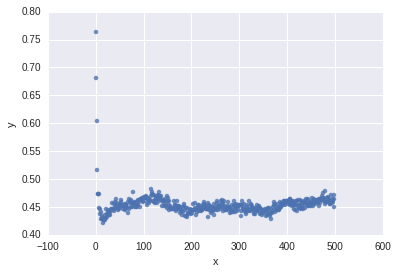

In [29]:
import seaborn as sns
import pandas as pd
sns.set()
%matplotlib inline

sns.regplot('x','y',pd.DataFrame(zip(range(len(m)),
                [x[sent_model_info['ids_to_index'][identity_to_id['democrat']+'e']] for x in m]),columns=['x','y']),
            fit_reg=False)

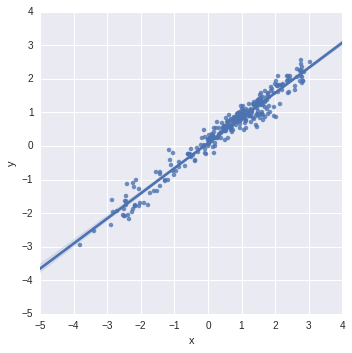

In [31]:
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline
x = np.load(open(os.path.join(output_dir,"sent_res_final/1_mu.npy")))
y = np.load(open(os.path.join(output_dir,"sent_res_final/499_mu.npy")))
k = pd.DataFrame()
k['y'] = [z for i,z in enumerate(y) if sent_model_info['index_to_ids'][i].endswith('e')]
k['x'] = [z for i,z in enumerate(x) if sent_model_info['index_to_ids'][i].endswith('e')]
sns.lmplot('x','y',k)

In [200]:
mu_fils = [x for x in glob.glob("new_recent/assoc_res_final/*_mu.npy") if 'assoc_mu' not in x]
mus = {}
for l in mu_fils:
    mus[int(l.replace("new_recent/assoc_res_final/","").replace("_mu.npy","")) + 1] = np.load(l)
m = [mus[i] for i in range(len(mus))]
print len(m)

559


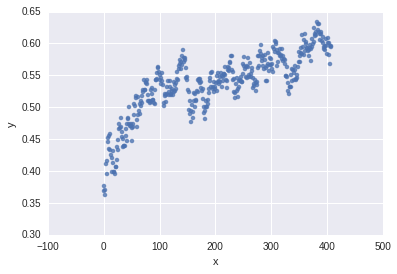

In [202]:
sns.regplot('x','y',pd.DataFrame(zip(range(len(m[150:])),
                [x[205] for x in m[150:]]),columns=['x','y']),
            fit_reg=False)